# Energy Efficiency in Buildings

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression

In [ ]:
# dataset directory https://archive.ics.uci.edu/dataset/242/energy+efficiency

energy_src = '/content/ENB2012_data.xlsx'

In [ ]:
# upload as dataframe

energy_df = pd.read_excel(energy_src)
energy_df = energy_df.drop('Y2', axis=1)
display(energy_df)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


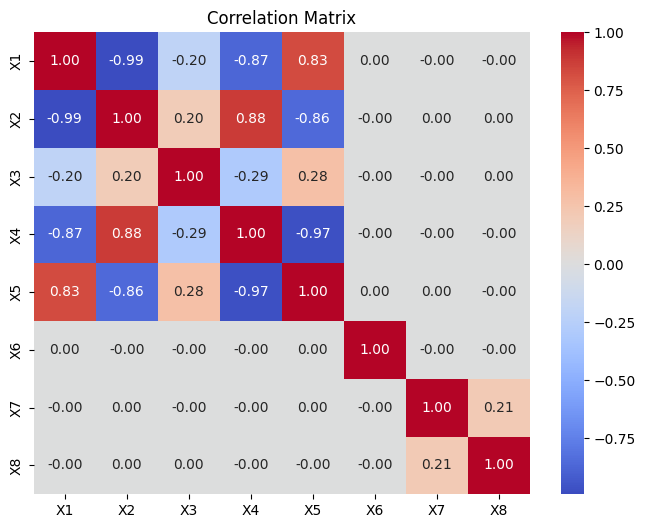

In [ ]:
# features correlation matrix

correlation_matrix = energy_df.drop('Y1', axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

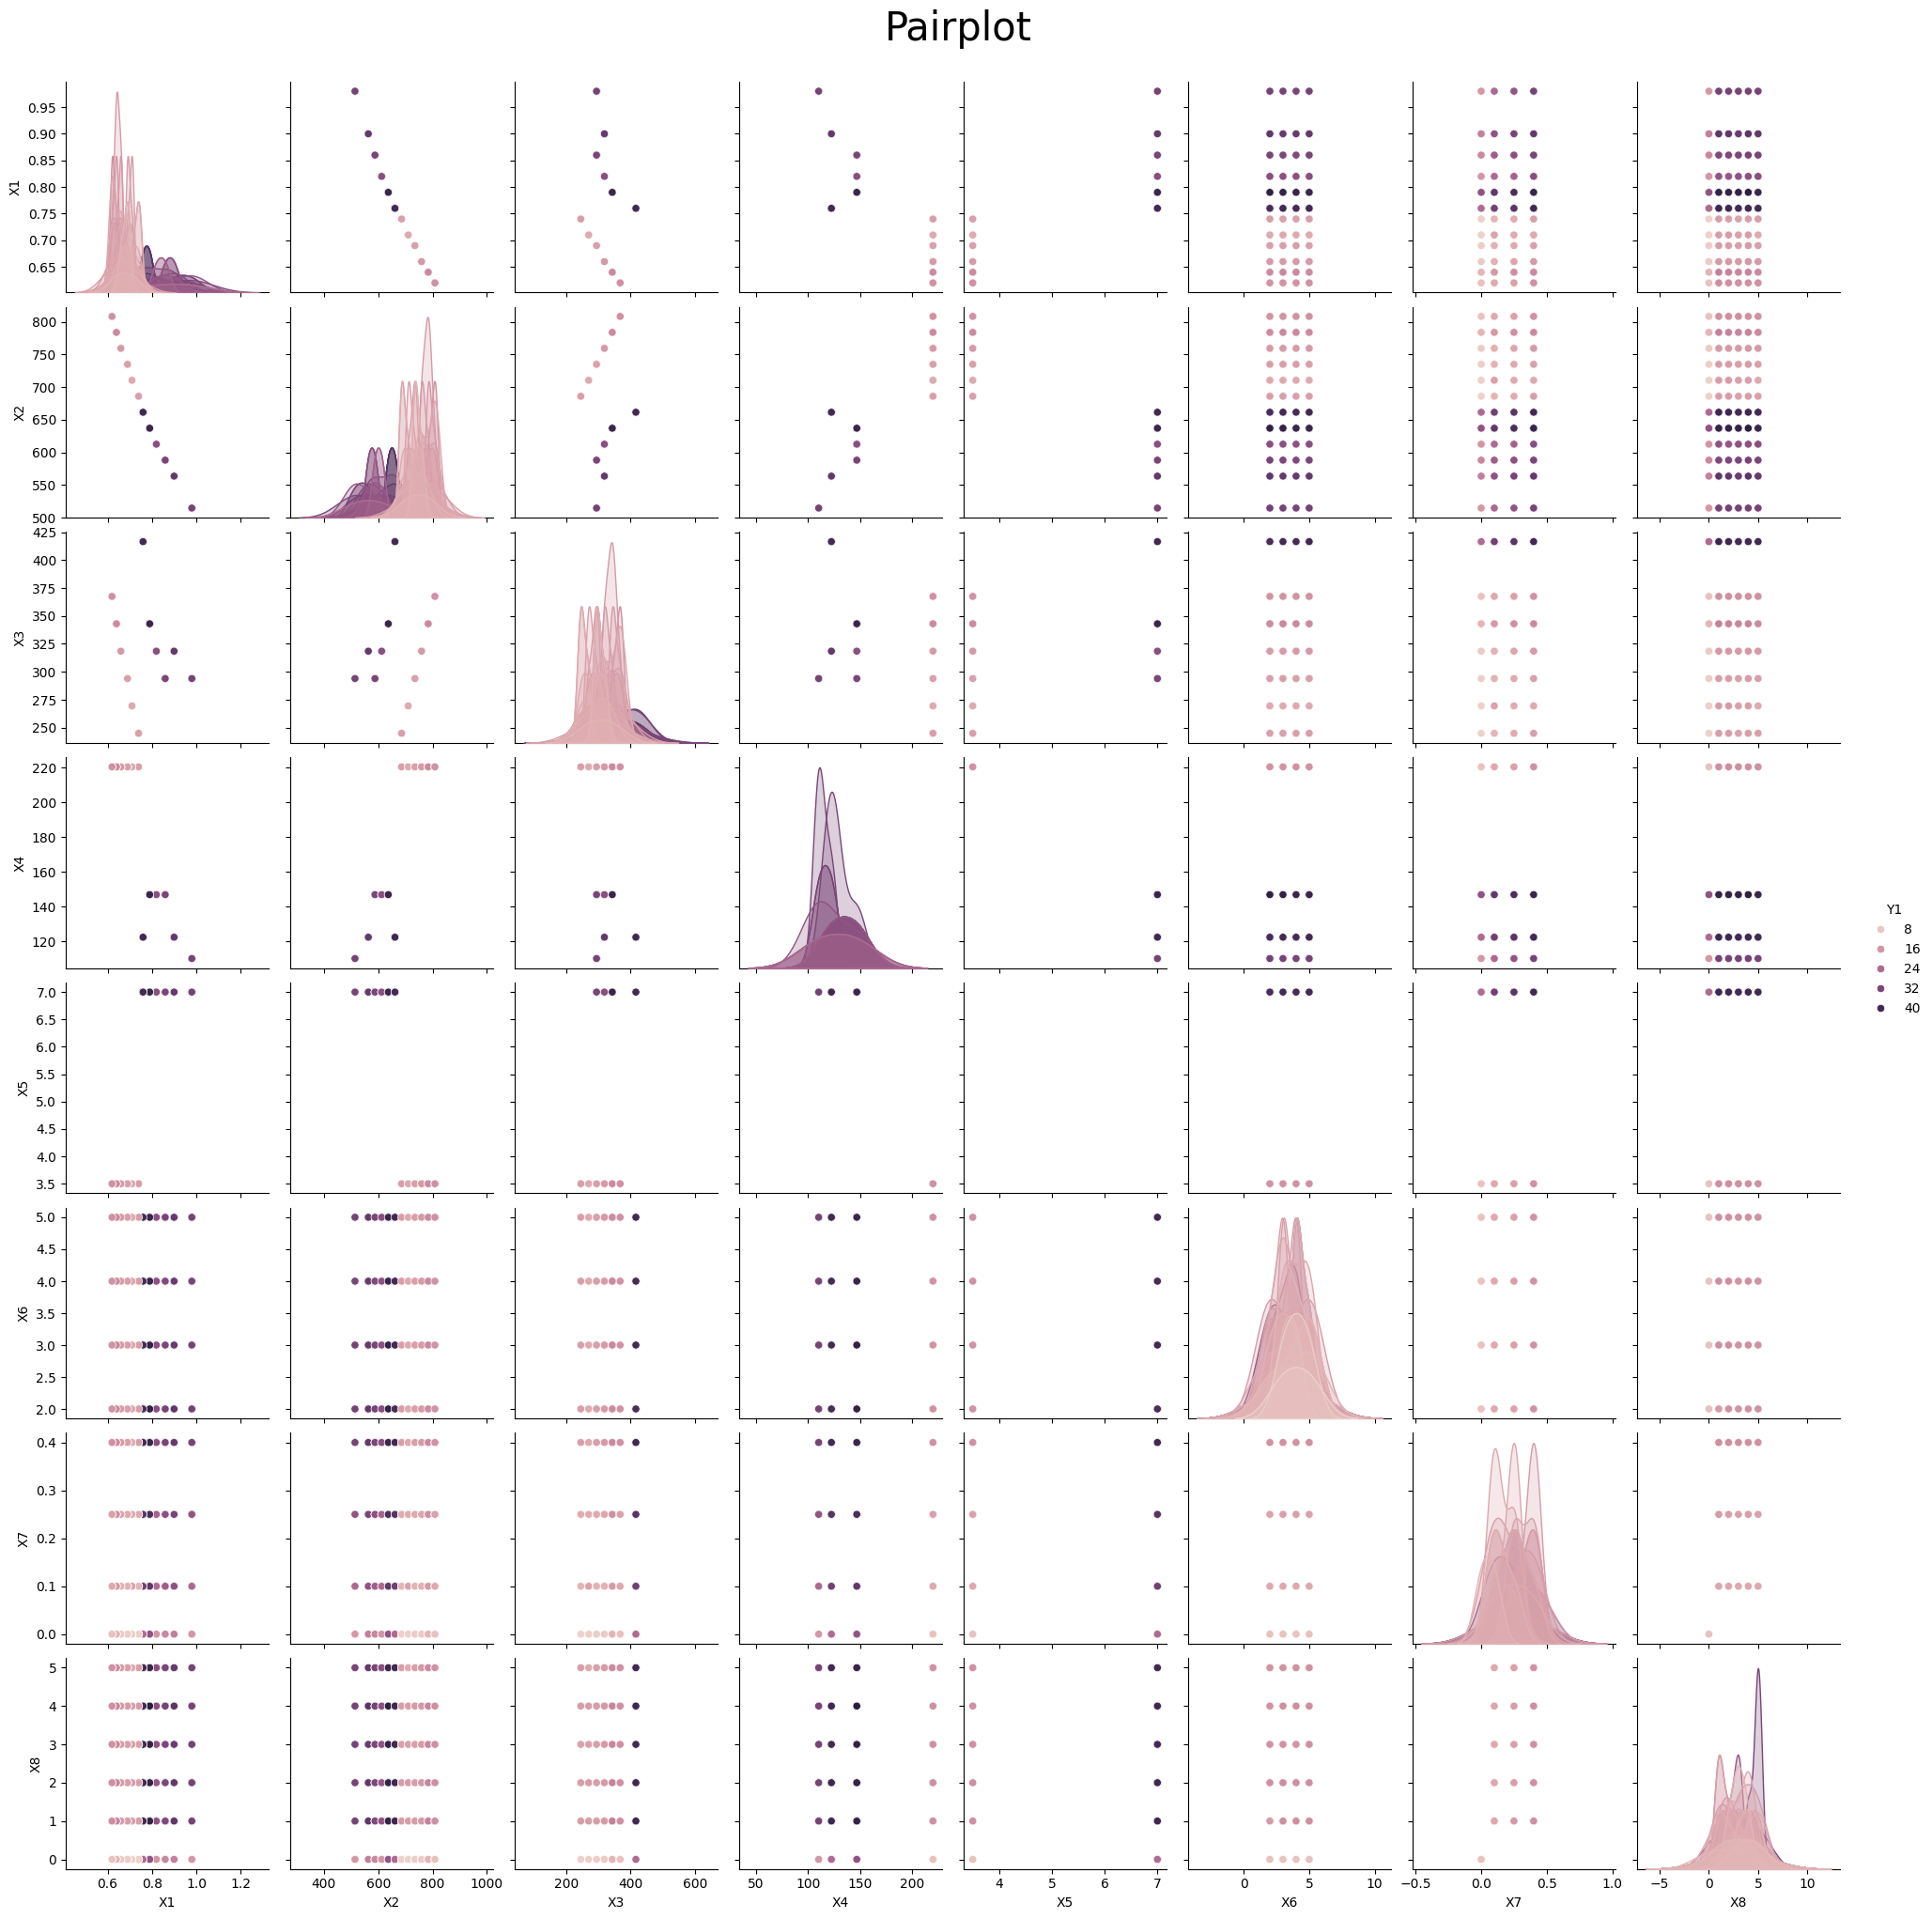

In [ ]:
# features pairplot

g = sns.pairplot(energy_df, hue='Y1')
g.fig.suptitle('Pairplot', y=1.025, fontsize=30)
plt.show()

In [ ]:
# train-val-test split

x = energy_df.drop('Y1', axis=1)
y = energy_df['Y1']

X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=25)         # train-temp split 60/40
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=25)   # then temp split to val-test 50/50

In [ ]:
# finding best regularization alpha

max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 300]):    # 10 different regularization alpha values
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)      # standard scaler and linear ridge regression pipeline
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)                             # training
    val_R2 = mdl.score(X_val,y_val)                                   # validation
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

Alpha: 0.0
	Coefficients: [-6.33729525e+00 -5.31775428e+14  2.64610319e+14  5.48578356e+14
  5.89876336e+00 -7.80689159e-02  2.67273107e+00  3.70464740e-01]
	Intercept: 22.794152183818102
	Training accuracy (R2): 0.913390933411847
	Validation accuracy (R2): 0.9148124592550136
Alpha: 0.1
	Coefficients: [-6.71686864 -4.04376153  0.89755837 -4.35284439  6.44104198 -0.08451877
  2.74378411  0.24772434]
	Intercept: 22.445
	Training accuracy (R2): 0.914961881645172
	Validation accuracy (R2): 0.9176969731471132
Alpha: 0.5
	Coefficients: [-5.96525271 -3.52590328  1.02087894 -3.9103326   6.65297138 -0.08729504
  2.73936554  0.2501436 ]
	Intercept: 22.445
	Training accuracy (R2): 0.9148755788155221
	Validation accuracy (R2): 0.9175535776519537
Alpha: 1.0
	Coefficients: [-5.28689122 -3.07326295  1.13886895 -3.52846986  6.81032683 -0.08988276
  2.73431568  0.25265348]
	Intercept: 22.445
	Training accuracy (R2): 0.9147011174819605
	Validation accuracy (R2): 0.9172759862886167
Alpha: 5.0
	Coefficien

Best alpha: 0.1
Coefficients: [-6.71686864 -4.04376153  0.89755837 -4.35284439  6.44104198 -0.08451877
  2.74378411  0.24772434]
Intercept: 22.445
Testing accuracy (R2) of Best Model: 0.9148195716067721


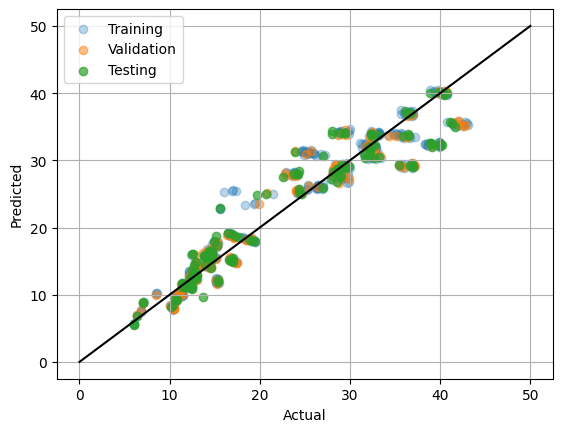

In [ ]:
# plotting results with best alpha

print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

test_R2 = best_mdl.score(X_test, y_test) # testing
print(f"Testing accuracy (R2) of Best Model: {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

## Results

**1. With train_test_split random_state = 42:**

Best alpha: 0.0

Coefficients: [ -6.30792682 -12.18147008   5.24201609   5.29147974   7.27876731
  -0.02000783   2.70136206   0.37646865]

Intercept: 22.079978260869556

Training accuracy (R2): 0.9181856631629426

Validation accuracy (R2): 0.9050278971395945

Testing accuracy (R2) of Best Model: 0.9195870512225823

**2. With train_test_split random_state = 25:**

Best alpha: 0.1

Coefficients: [-6.71686864 -4.04376153  0.89755837 -4.35284439  6.44104198 -0.08451877
  2.74378411  0.24772434]

Intercept: 22.445

Training accuracy (R2): 0.914961881645172

Validation accuracy (R2): 0.9176969731471132

Testing accuracy (R2) of Best Model: 0.9148195716067721

# *Limited to first 5 features*

In [ ]:
print(best_mdl[1].coef_)

[-6.71686864 -4.04376153  0.89755837 -4.35284439  6.44104198 -0.08451877
  2.74378411  0.24772434]


In [ ]:
# top 5 features

feat_coef = pd.DataFrame({'Feature': x.columns, 'Coefficient': best_mdl[1].coef_})
feat_coef['Coefficient'] = feat_coef['Coefficient'].apply(abs)
feat_coef_sorted = feat_coef.sort_values(by='Coefficient', ascending=False)
top_5 = feat_coef_sorted.drop([5,6,7], axis=0)


display(top_5)

,Feature,Coefficient
0,X1,6.716869
4,X5,6.441042
3,X4,4.352844
1,X2,4.043762
2,X3,0.897558


In [ ]:
# updated dataframe with only top 5 features

new_energy_df = energy_df.drop(columns=['X6', 'X7', 'X8'])
display(new_energy_df)

,X1,X2,X3,X4,X5,Y1
0,0.98,514.5,294.0,110.25,7.0,15.55
1,0.98,514.5,294.0,110.25,7.0,15.55
2,0.98,514.5,294.0,110.25,7.0,15.55
3,0.98,514.5,294.0,110.25,7.0,15.55
4,0.90,563.5,318.5,122.50,7.0,20.84
...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,17.88
764,0.62,808.5,367.5,220.50,3.5,16.54
765,0.62,808.5,367.5,220.50,3.5,16.44
766,0.62,808.5,367.5,220.50,3.5,16.48


In [ ]:
# new train-val-test split

x = new_energy_df.drop('Y1', axis=1)
y = new_energy_df['Y1']

X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=25)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=25)

In [ ]:
# finding best regularization alpha

max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0, 0.1, 0.5, 1, 5, 10, 50, 100, 150, 300]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

Alpha: 0.0
	Coefficients: [-6.49097250e+00 -3.25303715e+14  1.61870435e+14  3.35582594e+14
  5.97116897e+00]
	Intercept: 22.658587346582653
	Training accuracy (R2): 0.8358759252940726
	Validation accuracy (R2): 0.8446220448917073
Alpha: 0.1
	Coefficients: [-6.27501645 -3.86635834  1.03645565 -4.24787306  6.35284646]
	Intercept: 22.445000000000004
	Training accuracy (R2): 0.8370141655870711
	Validation accuracy (R2): 0.8464801099296948
Alpha: 0.5
	Coefficients: [-5.5722134  -3.38279355  1.15212335 -3.8349129   6.54929081]
	Intercept: 22.445
	Training accuracy (R2): 0.8369384637828075
	Validation accuracy (R2): 0.8461944206050825
Alpha: 1.0
	Coefficients: [-4.93730727 -2.95997366  1.26294658 -3.47850027  6.69445322]
	Intercept: 22.445
	Training accuracy (R2): 0.8367850505338686
	Validation accuracy (R2): 0.8457787707017952
Alpha: 5.0
	Coefficients: [-2.86274556 -1.77565175  1.7115746  -2.5468527   6.71397112]
	Intercept: 22.445
	Training accuracy (R2): 0.8354131946593243
	Validation accu

Best alpha: 0.1
Coefficients: [-6.27501645 -3.86635834  1.03645565 -4.24787306  6.35284646]
Intercept: 22.445000000000004
Testing accuracy (R2) of Best Model: 0.8498359856903323


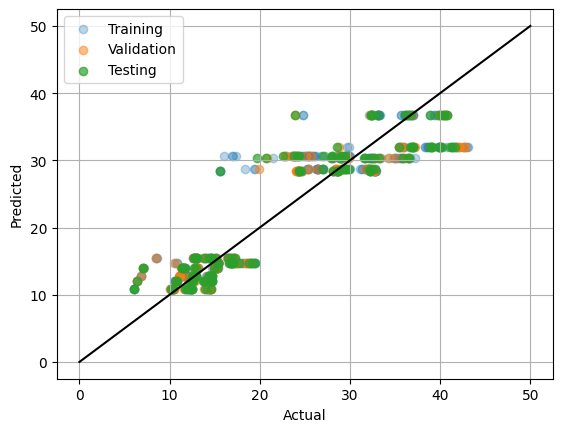

In [ ]:
# plotting results with best alpha

print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

test_R2 = best_mdl.score(X_test,y_test)
print(f"Testing accuracy (R2) of Best Model: {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

## Results

**1. With train_test_split random_state = 42:**

Best alpha: 1.0

Coefficients: [-6.67748943 -3.71318357  0.76864943 -3.9650576   7.12222615]

Intercept: 22.07997826086955

Training accuracy (R2): 0.8407613004372003

Validation accuracy (R2): 0.8389412344983701

Testing accuracy (R2) of Best Model: 0.8483672939767611

**2. With train_test_split random_state = 25:**

Best alpha: 0.1

Coefficients: [-6.27501645 -3.86635834  1.03645565 -4.24787306  6.35284646]

Intercept: 22.445000000000004

Training accuracy (R2): 0.8370141655870711

Validation accuracy (R2): 0.8464801099296948

Testing accuracy (R2) of Best Model: 0.8498359856903323

## *Insights*

I noticed how different `train_test_split` `random_state` values can results to different training results. It also resulted to different coefficient values.

Moreover, I learned that it is possible for testing accuracy to be slightly higher than training accuracy. This is perhaps due to the relatively small dataset, or that the testing data may have less noise than the training data.

Also, as can be seen from the scatter plot of the linear regression of the reduced features, the points cluster on two different regions and not lie along the line. This might suggest that the relationship of the reduced features and target variable do not exhibit linearity.